In [1]:
from matipo import SEQUENCE_DIR, GLOBALS_DIR
from matipo.sequence import Sequence
from matipo.util.autophase import autophase
from matipo.util.fft import get_freq_spectrum
from matipo.util.decimation import decimate
import numpy as np
import matplotlib.pyplot as plt

# set matplotlib figure size, default is quite small
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

# load Noise pulse sequence
seq = Sequence(SEQUENCE_DIR+'noise.py')

In [6]:
# load relevant global variables
seq.loadpar(GLOBALS_DIR+'frequency.yaml')

# set parameters
seq.setpar(
    n_samples=10000,
    t_dw=0.5e-6)

# print out the parameter set for reference
print(seq.par)

# run sequence, progress_handler is optional
y = await seq.run()

ParameterSet(f=14678755.961966246, t_dw=5e-07, n_samples=10000)


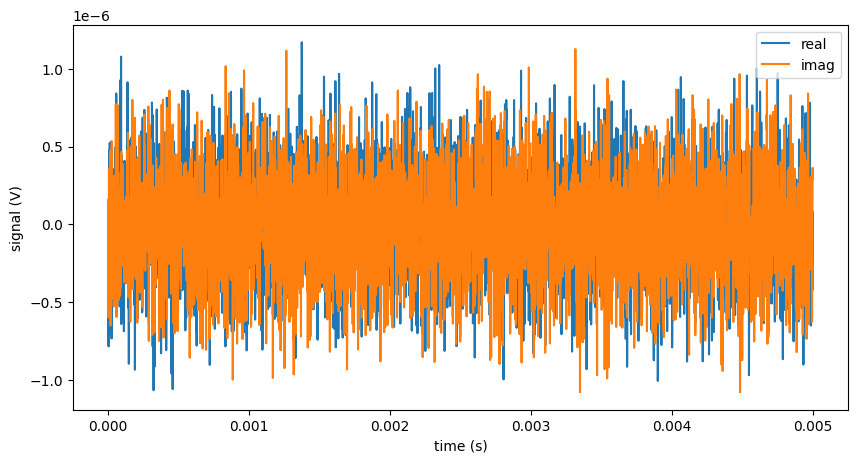

In [7]:
t = np.linspace(0, seq.par.n_samples*seq.par.t_dw, seq.par.n_samples)

plt.plot(t, y.real, label='real')
plt.plot(t, y.imag, label='imag')
plt.ylabel('signal (V)')
plt.xlabel('time (s)')
plt.legend()
plt.show()

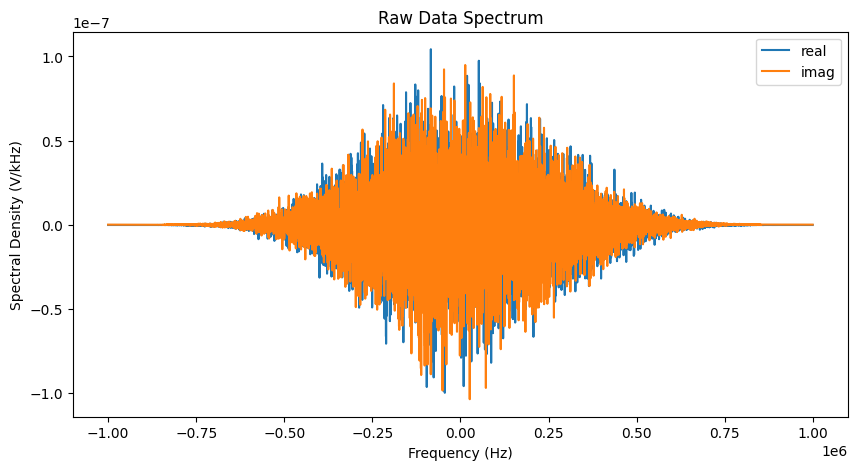

In [8]:
# plot the noise spectrum
freq, fft = get_freq_spectrum(y, seq.par.t_dw)
plt.plot(freq, fft.real, label='real')
plt.plot(freq, fft.imag, label='imag')
plt.ylabel('Spectral Density (V/kHz)')
plt.xlabel('Frequency (Hz)')
plt.title('Raw Data Spectrum')
plt.legend()
plt.show()

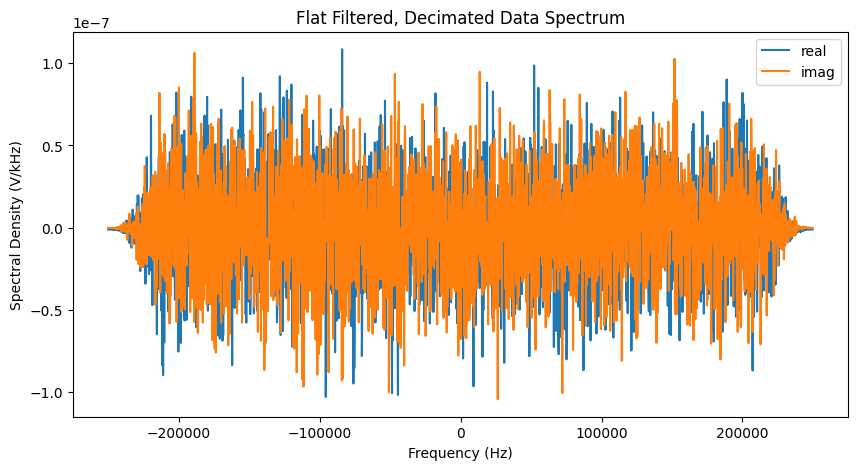

In [9]:
# The above data is the raw data from the hardware DSP, which does not have a flat frequency response
# to correct for it, oversample and use the decimate function in matipo.util.decimation
# an oversampling/decimation factor of 4 is recommended
DEC = 4
y_dec = decimate(y, DEC)
t_dw_dec = seq.par.t_dw*DEC
freq, fft = get_freq_spectrum(y_dec, t_dw_dec)
plt.plot(freq, fft.real, label='real')
plt.plot(freq, fft.imag, label='imag')
plt.ylabel('Spectral Density (V/kHz)')
plt.xlabel('Frequency (Hz)')
plt.title('Flat Filtered, Decimated Data Spectrum')
plt.legend()
plt.show()